This file is part of a program that is used to develop an objective way to
segment the fetus from ultrasound images, and to analyse the effectiveness of 
using the resulting mask to produce an unobstructed visualisation of the fetus.
The research is organised in three phases: (1) noise reduction filters, 
(2a) heuristic segmentation models, (2b) deep learning segmentation
approach (U-net), and (3) the volume visualisation. The program is developed
for the master Computational Science at the UvA from February to November 2020.

This file contains code for the methodology of the datasets. <br>
You can run this file to plot the datasets.

Made by Romy Meester


In [1]:
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import os
import copy
from jupyterthemes import jtplot

In [2]:
jtplot.style(context='paper', fscale=1.6, ticks=True)

In [3]:
# Constants
DATA_PATH = '../datasets/'
RESULTS_PATH = 'results_method'
RESULTS_IMG_PATH = os.path.join(RESULTS_PATH, 'results_datasets') 

In [4]:
def create_dir(PATH):
    """ Create a directory. """
    try:
        os.mkdir(PATH)
        print('Directory', PATH, 'created' )
    except FileExistsError:
        print('Directory', PATH, 'already exists' )

# create results folder
create_dir(RESULTS_PATH)
        
# create results folder for the images
create_dir(RESULTS_IMG_PATH)

Directory results_method already exists
Directory results_method\results_datasets already exists


# Load US data

### Data paths

In [5]:
# The real original image, the real cropped image, and the ground truth images (binary labeled mask)
# dataset1
path_real_org1 = os.path.join(DATA_PATH, 'dataset1/real_org/')  
path_crop_org1 = os.path.join(DATA_PATH, 'dataset1/crop_org/')
path_crop_gt1 =  os.path.join(DATA_PATH, 'dataset1/crop_gt/')

#dataset2
path_real_org2 = os.path.join(DATA_PATH, 'dataset2/real_org/')
path_crop_org2 = os.path.join(DATA_PATH, 'dataset2/crop_org/')
path_crop_gt2 = os.path.join(DATA_PATH, 'dataset2/crop_gt/')

#dataset3
path_real_org3 = os.path.join(DATA_PATH, 'dataset3/real_org/')
path_crop_org3 = os.path.join(DATA_PATH, 'dataset3/crop_org/')
path_crop_gt3 = os.path.join(DATA_PATH, 'dataset3/crop_gt/')

#dataset4
path_real_org4 = os.path.join(DATA_PATH, 'dataset4/real_org/')
path_crop_org4 = os.path.join(DATA_PATH, 'dataset4/crop_org/')
path_crop_gt4 = os.path.join(DATA_PATH, 'dataset4/crop_gt/')

#dataset5
path_real_org5 = os.path.join(DATA_PATH, 'dataset5/real_org/')
path_crop_org5 = os.path.join(DATA_PATH, 'dataset5/crop_org/')
path_crop_gt5 = os.path.join(DATA_PATH, 'dataset5/crop_gt/')

#dataset6
path_real_org6 = os.path.join(DATA_PATH, 'dataset6/real_org/')
path_crop_org6 = os.path.join(DATA_PATH, 'dataset6/crop_org/')
path_crop_gt6 = os.path.join(DATA_PATH, 'dataset6/crop_gt/')

#dataset7
path_real_org7 = os.path.join(DATA_PATH, 'dataset7/real_org/')
path_crop_org7 = os.path.join(DATA_PATH, 'dataset7/crop_org/')
path_crop_gt7 = os.path.join(DATA_PATH, 'dataset7/crop_gt/')

### Datasets

In [6]:
def get_pixels(scans):
    """ Get pixel values of the scans. """ 
    image = np.stack([s.pixel_array for s in scans])       
    return np.array(image)

def load_scan(path):
    """ Load the scans and return the pixel values. """
    get_files = os.listdir(path) 
    slices = [] 

    # get all the slices
    for i in get_files:
        if i.endswith(".dcm"):
            with open(path + i, 'r') as f:
                path_filename = path + i
                one_slice = pydicom.dcmread(path_filename)
                slices.append(one_slice)

    # get all the pixel values of the scan slices
    try:
        images = get_pixels(slices)
    except: 
        images = np.array(0)
        print('Path file is empty.')
        
    # squeeze image when not in series
    images = images.squeeze()
    
    return images 


### Real original dataset

In [7]:
def get_data_scans(paths):
    """ Generate the dataset which includes all the images of different datasets."""
    datasets = {}
    
    for key, value in paths.items():
        print('load: ', value)
        images = load_scan(value)
        datasets[key] = images
        
    print('dataset created')
    return datasets
        

In [8]:
paths_realorg = {'realorg1': path_real_org1, 'realorg2': path_real_org2, 'realorg3': path_real_org3,
                 'realorg4': path_real_org4, 'realorg5': path_real_org5, 'realorg6': path_real_org6,
                 'realorg7': path_real_org7}

dataset_realorg = get_data_scans(paths_realorg)

load:  ../datasets/dataset1/real_org/
load:  ../datasets/dataset2/real_org/
load:  ../datasets/dataset3/real_org/
load:  ../datasets/dataset4/real_org/
load:  ../datasets/dataset5/real_org/
load:  ../datasets/dataset6/real_org/
load:  ../datasets/dataset7/real_org/
dataset created


# Show real original images

realorg1 300/600


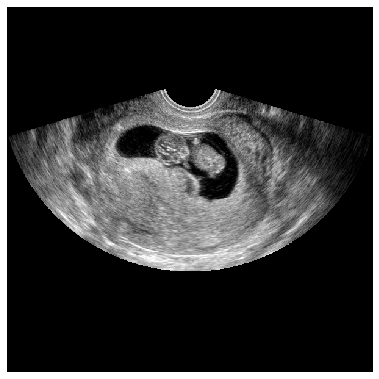

realorg2 150/300


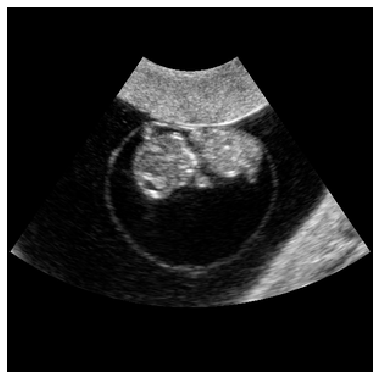

realorg3 150/300


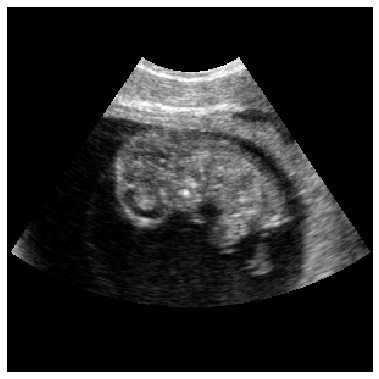

realorg4 150/300


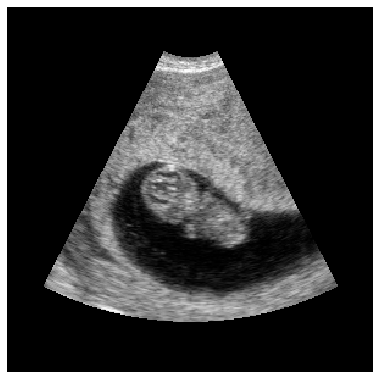

realorg5 150/300


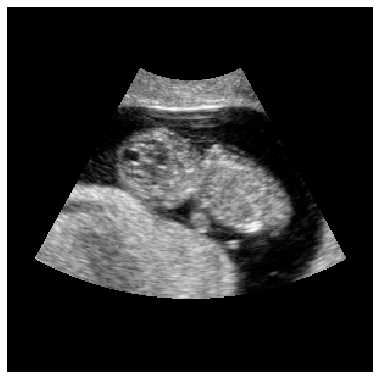

realorg6 150/300


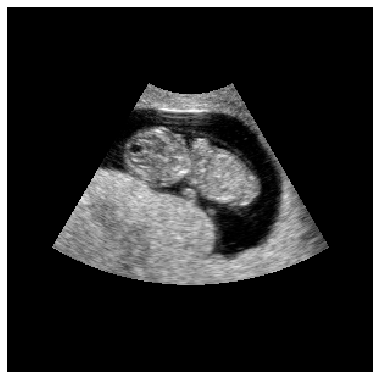

realorg7 150/300


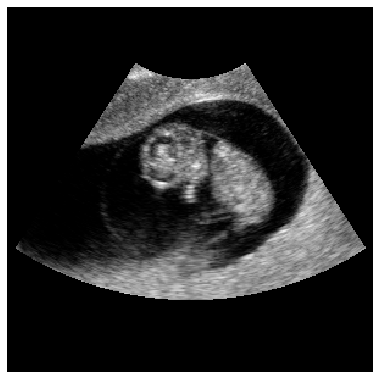

In [9]:
def show_images(dataset): 
    "Show all the images from the dataset. "
    
    for key, image in dataset.items():
        index = round(image.shape[0] /2.)
        titlename = key + ' ' + str(index) + '/' + str(image.shape[0])
        print(titlename)
        
        plt.imshow(image[index], cmap='gray') 
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(RESULTS_IMG_PATH + '/' + str(key) + '.png')
        plt.show()

show_images(dataset_realorg)


# Show cropped dataset1

In [10]:
# load files of cropped dataset1
images_org =  load_scan(path_crop_org1)
images_binary = load_scan(path_crop_gt1)

In [11]:
def apply_mask(frame_org, frame_mask):
    """ Apply a mask over the original image. """
    frame_result = copy.copy(frame_org)
    frame_result[frame_mask == 0] = 0

    return frame_result
    
images_invmask = apply_mask(images_org, images_binary)

Original image 76/151


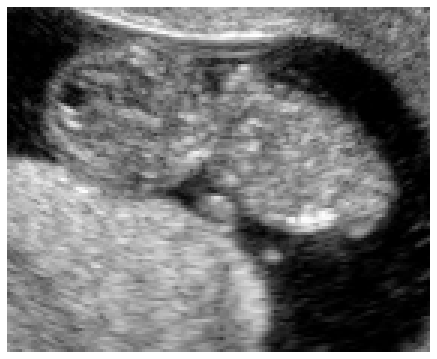

Annotated mask of fetus 76/151


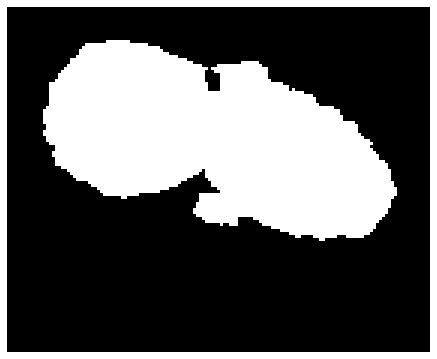

Result inverted mask 76/151


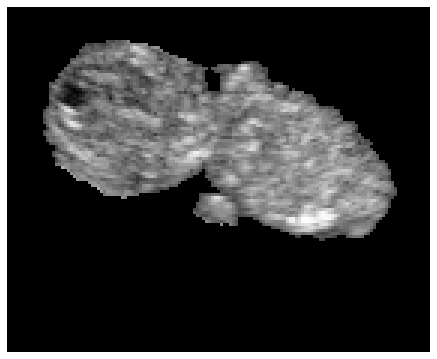

In [12]:
# show the images 
index = round(images_org.shape[0] /2.)
plot = [images_org, images_binary, images_invmask]
namestitle = ['Original image', 'Annotated mask of fetus', 'Result inverted mask']
names = ['original', 'binary', 'invmask']

for key, value in enumerate(plot): 
    titlename = namestitle[key] + ' ' + str(index) + '/' + str(images_org.shape[0])
    print(titlename)
    
    plt.imshow(value[index,:,:], cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(RESULTS_IMG_PATH + '/' + str(index) + '_'+ str(names[key]) + '.png')
    plt.show()
    

# Show cropped dataset original frames

In [13]:
# load image scans
paths_croporg = {'croporg1': path_crop_org1, 'croporg2': path_crop_org2, 'croporg3': path_crop_org3,
                 'croporg4': path_crop_org4, 'croporg5': path_crop_org5, 'croporg6': path_crop_org6,
                 'croporg7': path_crop_org7}

dataset_croporg = get_data_scans(paths_croporg)

load:  ../datasets/dataset1/crop_org/
load:  ../datasets/dataset2/crop_org/
load:  ../datasets/dataset3/crop_org/
load:  ../datasets/dataset4/crop_org/
load:  ../datasets/dataset5/crop_org/
load:  ../datasets/dataset6/crop_org/
load:  ../datasets/dataset7/crop_org/
dataset created


croporg1 76/151


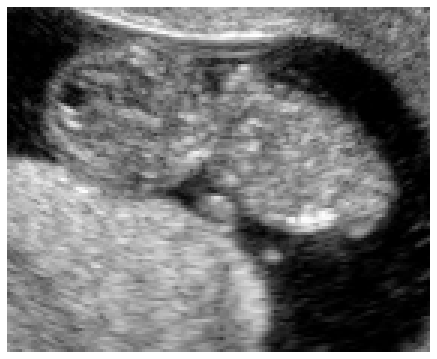

croporg2 58/115


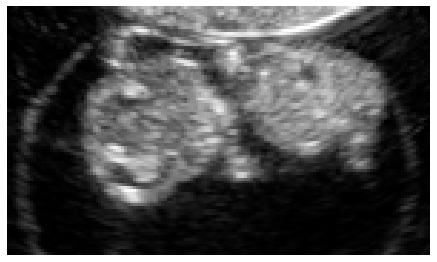

croporg3 52/104


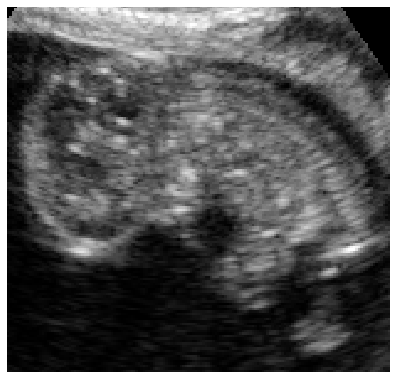

croporg4 72/143


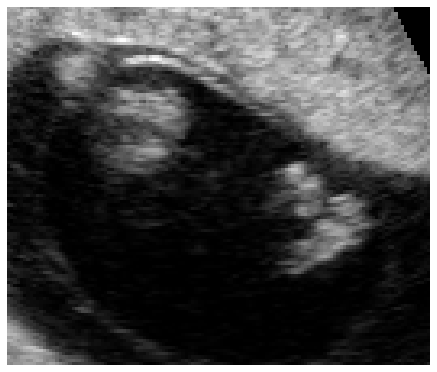

croporg5 104/207


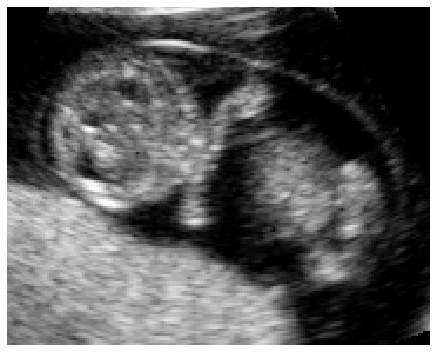

croporg6 90/180


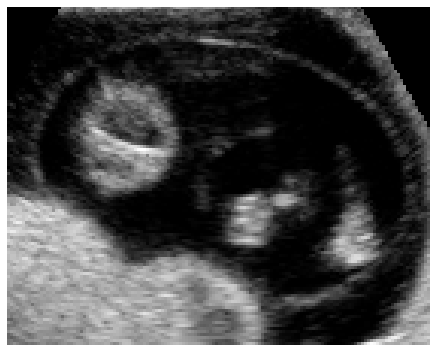

croporg7 92/184


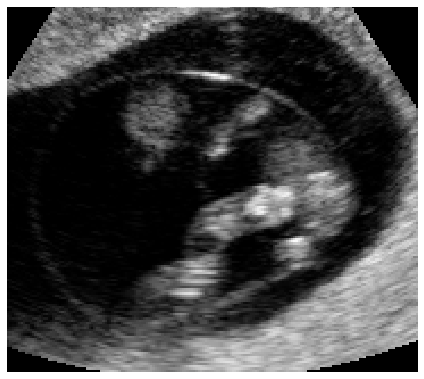

In [14]:
# show the images 
show_images(dataset_croporg)

croporg1


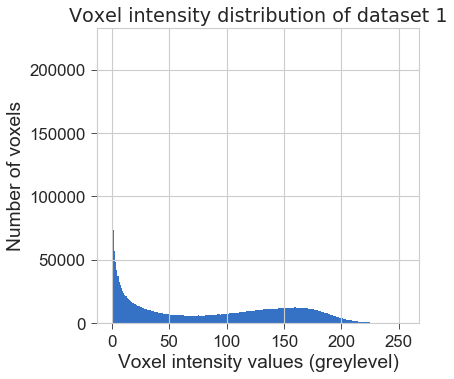

croporg2


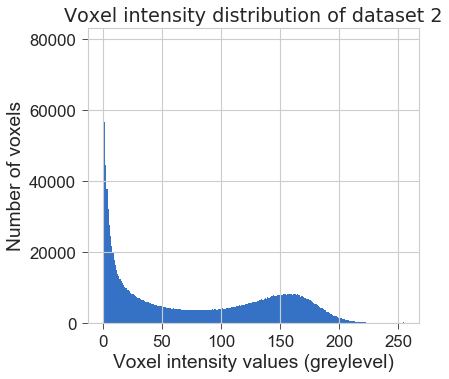

croporg3


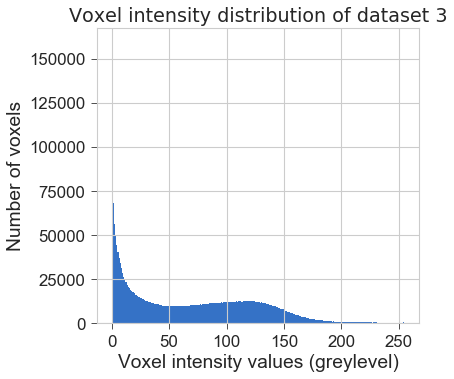

croporg4


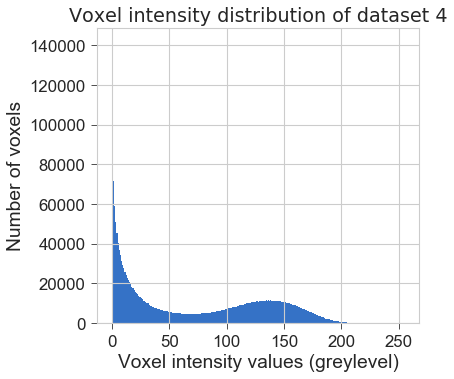

croporg5


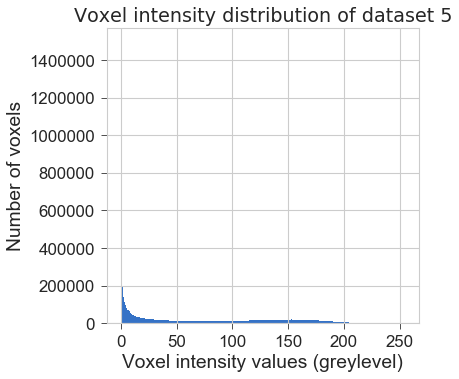

croporg6


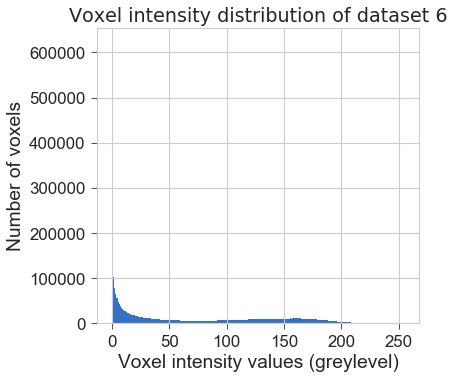

croporg7


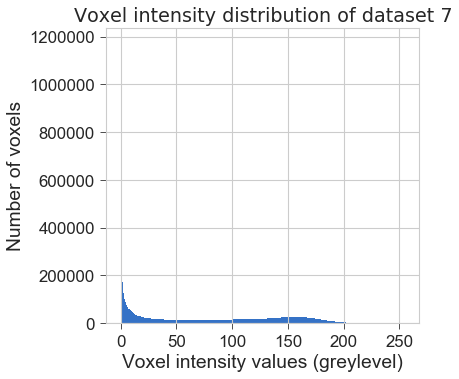

In [15]:
def show_hist(dataset):
    "Show the histogram from the dataset. "
    
    for key, image in dataset.items():
        print(key)
        titlename = "Voxel intensity distribution of dataset " + key[-1]
        img = image.flatten()
        
        plt.hist(img, bins=range(256))
        plt.title(titlename, fontname="DejaVu Sans")
        plt.xlabel("Voxel intensity values (greylevel)")
        plt.ylabel("Number of voxels")
        plt.tight_layout()
        plt.savefig(RESULTS_IMG_PATH + '/' + 'hist' + str(key[-1]) + '.png')
        plt.show()

show_hist(dataset_croporg)


# (Extra) check dataset

In [16]:
from glob import glob

def number_volumeslices(slices):
    """ Check number of images with fetus. """
    count = 0
    for slicex in slices: 
        if np.any(slicex == 1):
            count += 1
    
    return count

# Check dataset
g = glob(paths_croporg['croporg1'] + "/*")
print("Total no. of images are: %d" %len(g))

fetus = number_volumeslices(images_binary)
print("No. of images with fetus are: {}/{}".format(fetus, len(images_binary)))

Total no. of images are: 151
No. of images with fetus are: 108/151


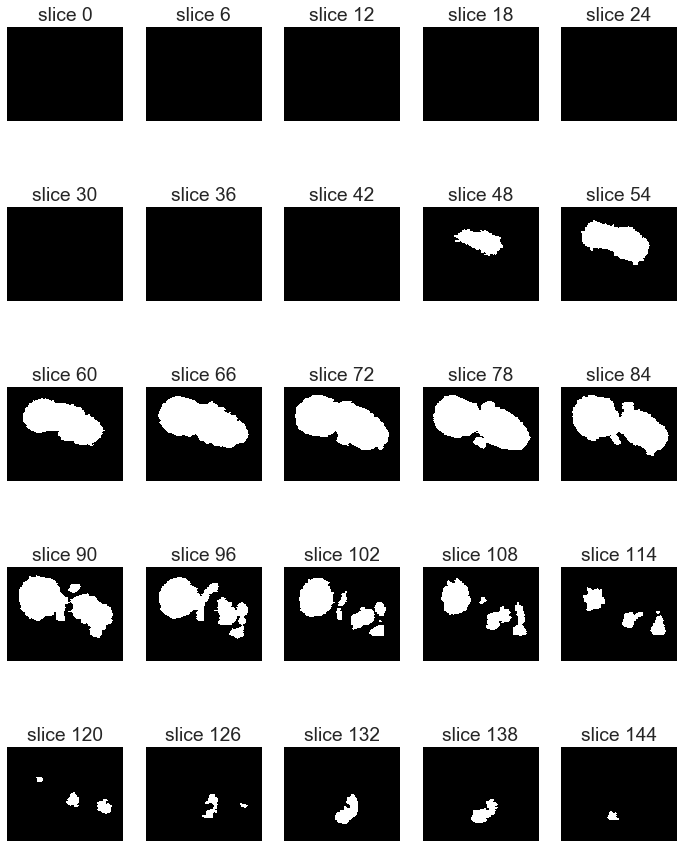

In [17]:
def sample_stack(stack, rows=8, cols=5, steps=4):
    """ Show sample slices of the stacked images. """
    fig,ax = plt.subplots(rows,cols,figsize=[12,16])
    
    show_slice = []
    for i in range(0,len(imgs_to_process), steps):
        show_slice.append(i)
    
    show_index = 0
    for i in range(rows*cols):
        if show_index == len(show_slice):
            show_index = 0         
   
        x = show_slice[show_index]
        ax[int(i/cols),int(i % cols)].set_title('slice %d' % x)
        ax[int(i/cols),int(i % cols)].imshow(stack[x],cmap='gray')
        ax[int(i/cols),int(i % cols)].axis('off')
        show_index += 1
                
    plt.show()       

imgs_to_process = images_binary #images_org
sample_stack(imgs_to_process, rows=5, cols=5, steps=6)